### (Q) objective: finding the optimal Hyper Parameters ( max_depth, min_samples_split,                   min_samples_leaf Using GridSearchCv



along with that:

    -null value checks
    -label encoding
    -correlation checks
    -outlier analysis
    -0 variance checks
    -Building DT

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [21]:

data= pd.read_csv(r"C:\Users\Arvind Vasa\AI & ML\stats and ML\Machine Learning by utkash\bank.csv")
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Null value check

In [22]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Label encoding

In [23]:
def preprocess(df):
    dup_df= df.copy()
    le= preprocessing.LabelEncoder()
    
    dup_df['job']= le.fit_transform(dup_df['job'])
    dup_df['marital']= le.fit_transform(dup_df['marital'])
    dup_df['education']= le.fit_transform(dup_df['education'])
    dup_df['default']= le.fit_transform(dup_df['default'])
    dup_df['housing']= le.fit_transform(dup_df['housing'])
    dup_df['loan']= le.fit_transform(dup_df['loan'])
    dup_df['deposit']= le.fit_transform(dup_df['deposit'])
    dup_df['contact']= le.fit_transform(dup_df['contact'])
    dup_df['month']= le.fit_transform(dup_df['month'])
    dup_df['poutcome']= le.fit_transform(dup_df['poutcome'])
    
    return dup_df

In [24]:
processed_data= preprocess(data)
processed_data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

### ### Correlations

<Axes: >

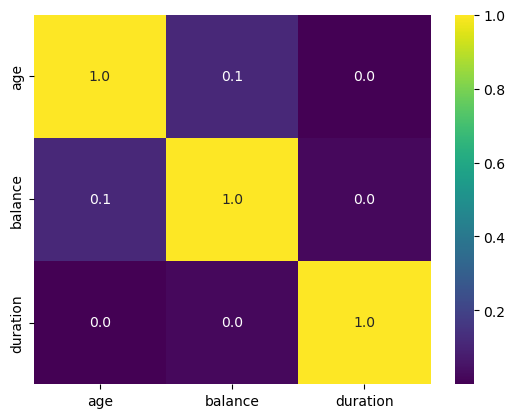

In [25]:
quantitative_data= processed_data.loc[:,['age','balance','duration']]
# corr_mat= processed_data.corr()
quantitative_data.head()
# sns.heatmap(corr_mat,cmap='viridis',annot=True, fmt= '.1f')

sns.heatmap(quantitative_data.corr(),cmap='viridis',annot=True, fmt= '.1f')

### Conclusion: 
No correlation among the quantitative variables

### Outlier analysis

In [26]:
quantitative_data.describe()

age       balance      duration
count  11162.000000  11162.000000  11162.000000
mean      41.231948   1528.538524    371.993818
std       11.913369   3225.413326    347.128386
min       18.000000  -6847.000000      2.000000
25%       32.000000    122.000000    138.000000
50%       39.000000    550.000000    255.000000
75%       49.000000   1708.000000    496.000000
max       95.000000  81204.000000   3881.000000

age column mean and median are statistically same, so no potential outliers 

balance and duration contains outliers

<Axes: xlabel='age', ylabel='Density'>

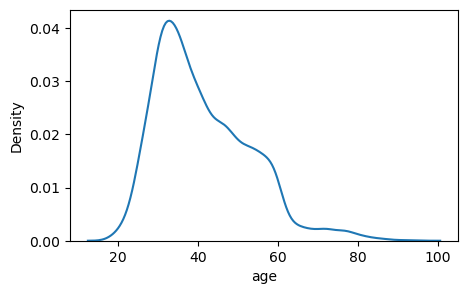

In [27]:
fig, ax= plt.subplots(figsize= (5,3))
sns.kdeplot(processed_data['age'])

<Axes: xlabel='balance', ylabel='Density'>

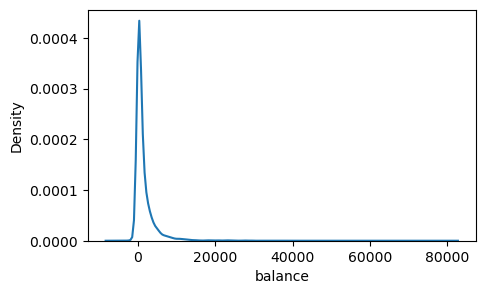

In [28]:
fig, ax= plt.subplots(figsize= (5,3))
sns.kdeplot(processed_data['balance'])

<Axes: xlabel='duration', ylabel='Density'>

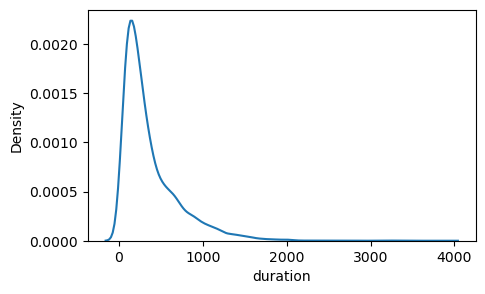

In [29]:
fig, ax= plt.subplots(figsize= (5,3))
sns.kdeplot(processed_data['duration'])

### 0 variance check

In [30]:
for var in quantitative_data:
    print(quantitative_data[var].var())

141.92836551002807
10403291.123191278
120498.11617000915


#### There is no such column with 0 variance

In [31]:
x= processed_data.drop(['deposit'],axis=1)
y= processed_data['deposit']

### Splitting data into train and test

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)

### Building Decision Tree

In [33]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': list(range(7,11)),
    'min_samples_split': [60,70,80],
    'min_samples_leaf': [60,70,80]
}

In [34]:
model= DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid= param_grid, cv=5, n_jobs=3)
grid_search.fit(x, y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini'], 'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [60, 70, 80],
                         'min_samples_split': [60, 70, 80]})

In [35]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 80, 'min_samples_split': 60}
Best Score:  0.7917959188259521


### max efficiency: 0.7917959188259521 occured  at max_depth: 9, min_samples_split: 60, min_samples_leaf: 70
